In [ ]:
!pip install pandas sqlalchemy psycopg2 matplotlib seaborn 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
import json

In [3]:
credentials = "../credentials.json"
with open(credentials) as f:
    creds = json.load(f)

DB_USER = creds["user"]
DB_PASSWORD = creds["password"]
DB_HOST = creds["host"]
DB_PORT = creds["port"]
DB_NAME = creds["database"]

engine = create_engine(f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

In [4]:
df = pd.read_sql("SELECT * FROM airbnb_data", con=engine)
display(df.head(50))

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",None
6,1004650,BlissArtsSpace!,61300605564,None,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,None
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,None
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,None
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,None


In [61]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 102599 filas y 26 columnas.


In [62]:
duplicates = df[df.duplicated()]
print(f"Número de filas duplicadas: {duplicates.shape[0]}")

Número de filas duplicadas: 541


In [63]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_data = pd.DataFrame({'Valores Nulos': missing_values, 'Porcentaje': missing_percentage})
print("Valores nulos por columna:")
display(missing_data[missing_data['Valores Nulos'] > 0])

Valores nulos por columna:


,Valores Nulos,Porcentaje
NAME,250,0.243667
host_identity_verified,289,0.281679
host name,406,0.395715
neighbourhood group,29,0.028265
neighbourhood,16,0.015595
lat,8,0.007797
long,8,0.007797
country,532,0.518524
country code,131,0.127682
instant_bookable,105,0.102340


In [ ]:
display(df.dtypes)

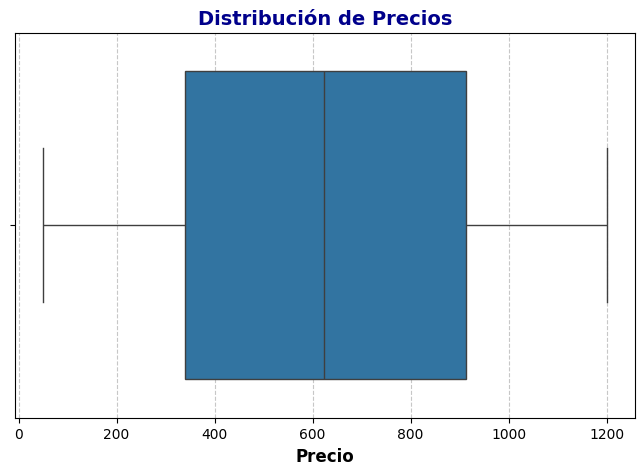

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'].str.replace('$', '').str.replace(',', '').astype(float))
plt.title("Distribución de Precios", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Precio", fontsize=12, fontweight="bold")
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()

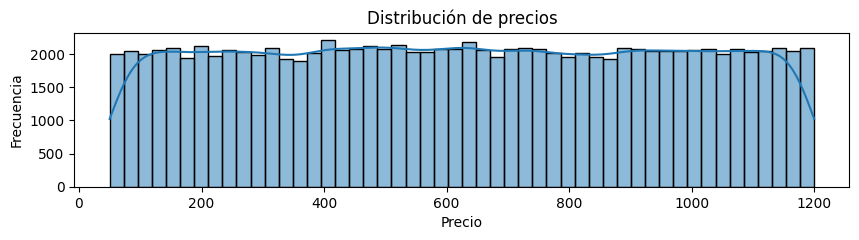

In [64]:
plt.figure(figsize=(10, 2))
sns.histplot(df['price'].str.replace('$', '').str.replace(',', '').astype(float), bins=50, kde=True)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios")
plt.show()


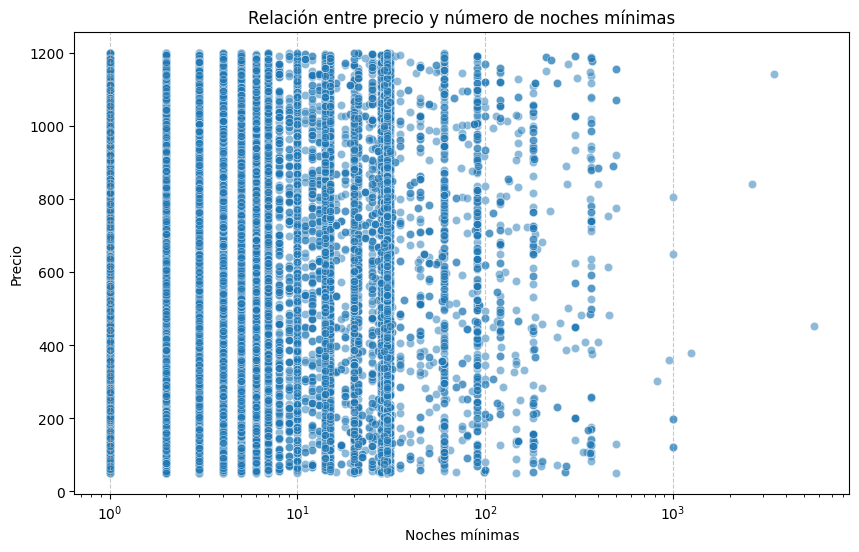

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['minimum nights'], y=df['price'].str.replace('$', '').str.replace(',', '').astype(float), alpha=0.5)
plt.xlabel("Noches mínimas")
plt.ylabel("Precio")
plt.title("Relación entre precio y número de noches mínimas")
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()


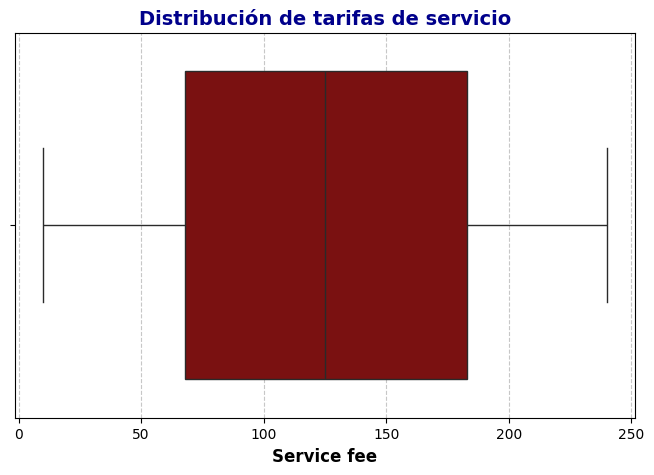

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['service fee'].str.replace('$', '').str.replace(',', '').astype(float), color= "darkred")
plt.title("Distribución de tarifas de servicio", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Service fee", fontsize=12, fontweight="bold")
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()

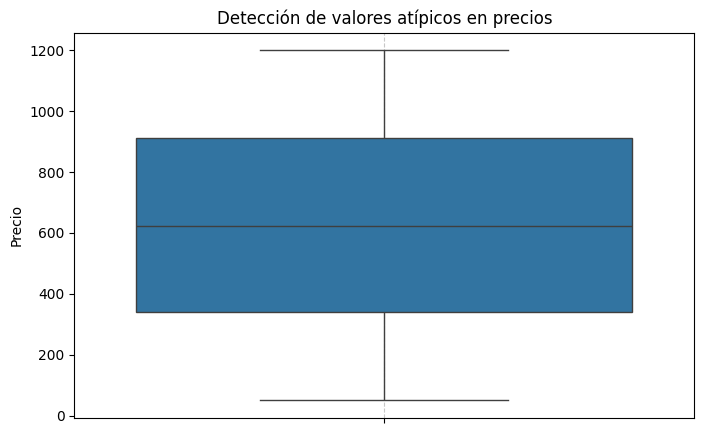

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['price'].str.replace('$', '').str.replace(',', '').astype(float))
plt.ylabel("Precio")
plt.title("Detección de valores atípicos en precios")
plt.show()


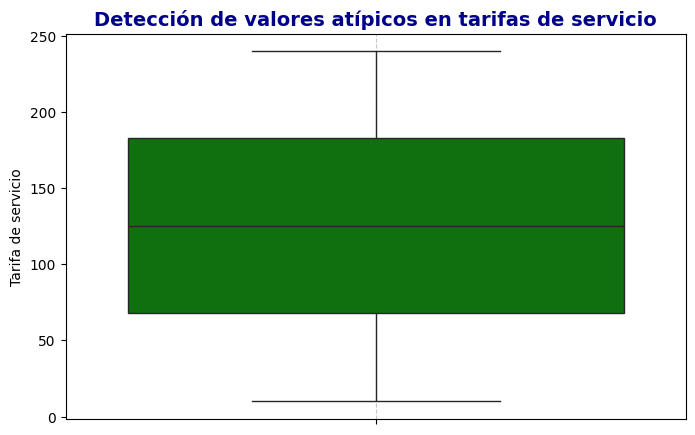

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['service fee'].str.replace('$', '').str.replace(',', '').astype(float), color = "green")
plt.ylabel("Tarifa de servicio")
plt.title("Detección de valores atípicos en tarifas de servicio", fontsize=14, fontweight="bold", color="darkblue") 
plt.show()

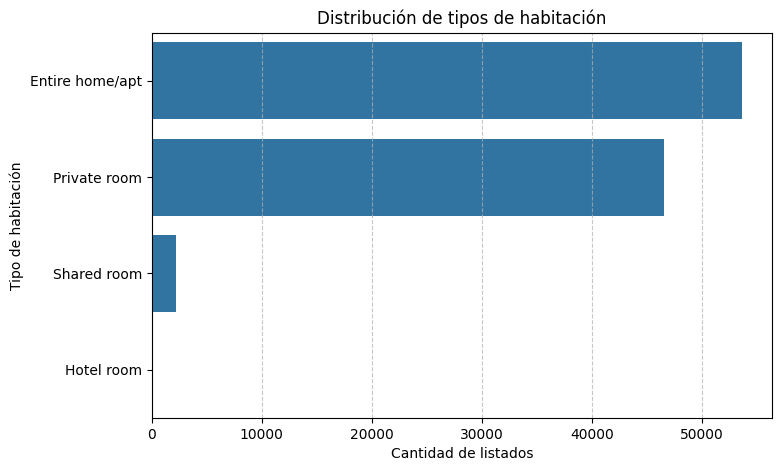

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['room type'], order=df['room type'].value_counts().index, color = "green")
plt.xlabel("Cantidad de listados")
plt.ylabel("Tipo de habitación")
plt.title("Distribución de tipos de habitación", fontsize=14, fontweight="bold", color="darkblue") 
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()

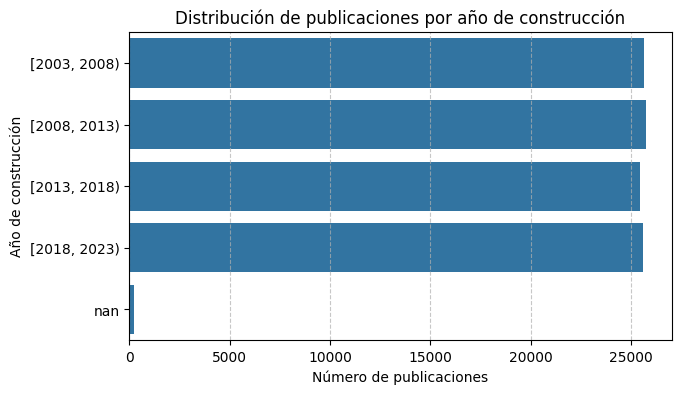

In [78]:
bins = list(range(int(df['Construction year'].min()), int(df['Construction year'].max()) + 5, 5))
df['Construction year range'] = pd.cut(df['Construction year'], bins=bins, right=False)

plt.figure(figsize=(7, 4))
sns.countplot(y=df['Construction year range'].astype(str), order=sorted(df['Construction year range'].astype(str).unique()))

plt.xlabel("Número de publicaciones")
plt.ylabel("Año de construcción")
plt.title("Distribución de publicaciones por año de construcción")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()


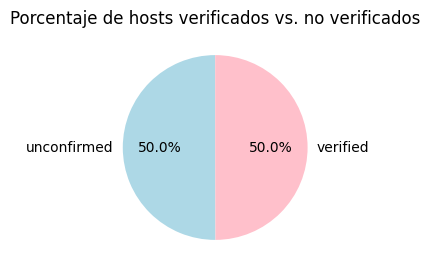

In [112]:
verified_counts = df['host_identity_verified'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%', colors=["lightblue", "pink"], startangle=90)
plt.title("Porcentaje de hosts verificados vs. no verificados")
plt.show()

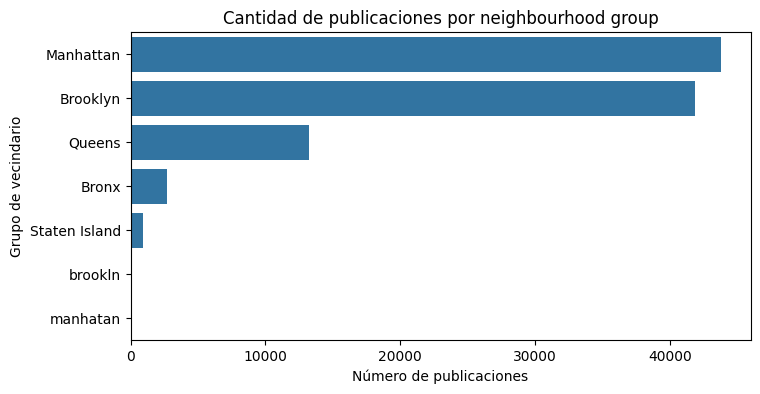

In [84]:
#por ciudad
plt.figure(figsize=(8, 4))
sns.countplot(y=df['neighbourhood group'], order=df['neighbourhood group'].value_counts().index)
plt.xlabel("Número de publicaciones")
plt.ylabel("Grupo de vecindario")
plt.title("Cantidad de publicaciones por neighbourhood group")
plt.show()

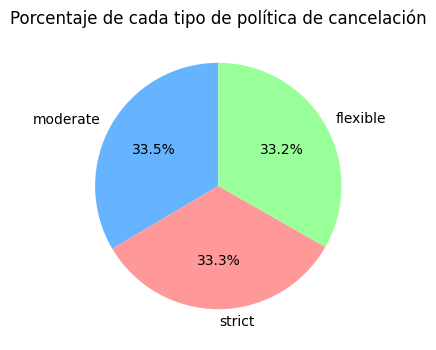

In [ ]:
cancellation_counts = df['cancellation_policy'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cancellation_counts, labels=cancellation_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#ff9999", "#99ff99", "#ffcc99"], startangle=90)
plt.title("Porcentaje de cada tipo de política de cancelación")
plt.show()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_9936\4111805183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_filtered['instant_bookable'], palette=["darkred", "green"])
C:\Users\Administrador\AppData\Local\Temp\ipykernel_9936\4111805183.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df_filtered['instant_bookable'], palette=["darkred", "green"])


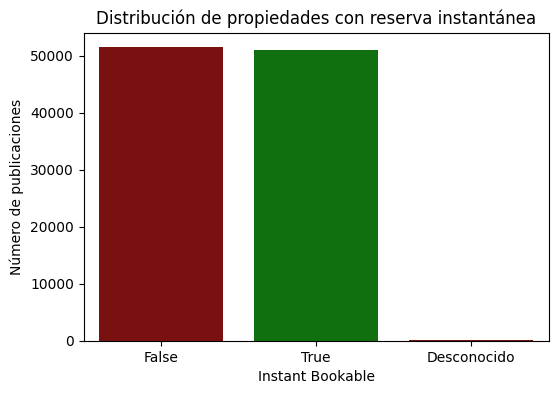

In [108]:
df_filtered = df.dropna(subset=['instant_bookable'])

plt.figure(figsize=(6, 4))
sns.countplot(x=df_filtered['instant_bookable'], palette=["darkred", "green"])
plt.xlabel("Instant Bookable")
plt.ylabel("Número de publicaciones")
plt.title("Distribución de propiedades con reserva instantánea")
plt.show()

In [5]:
min_year = df["Construction year"].min()
max_year = df["Construction year"].max()

print(f"El año mínimo de construcción es: {min_year}")
print(f"El año máximo de construcción es: {max_year}")

El año mínimo de construcción es: 2003.0
El año máximo de construcción es: 2022.0
